In [2]:
from salishsea_tools import viz_tools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cmocean.cm as cm
import glob
import sys

## Global definitions to use

In [3]:
year = 2018

# Look at gauged rivers

In [4]:
def read_gauged(fname):
    path = '../../../../../../results/forcing/rivers/observations/' + fname

    riv_df = pd.read_csv(path,header=None,delimiter=' ')
    mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
    riv = riv_df.rename(columns=mapping)
    riv_cols = riv.drop(columns=4)

    riv_cols['DateTime'] = pd.to_datetime(dict(year=riv_cols['YYYY'], month=riv_cols['MM'], day=riv_cols['DD']))

    return riv_cols

In [5]:
Nisqually = read_gauged('Nisqually_McKenna_flow')
Squamish = read_gauged('Squamish_Brackendale_flow')
Snohomish = read_gauged('Snohomish_Monroe_flow')
Skagit = read_gauged('Skagit_MountVernon_flow')

In [6]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Homathko_Mouth_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Homathko = riv_df.rename(columns=mapping)
Homathko['DateTime'] = pd.to_datetime(dict(year=Homathko['YYYY'], month=Homathko['MM'], day=Homathko['DD']))

In [7]:
riv_df = pd.read_csv('../../../../../../results/forcing/rivers/observations/Salmon_Sayward_flow',header=None,delimiter=' ')
mapping = {riv_df.columns[0]: 'YYYY', riv_df.columns[1]: 'MM', riv_df.columns[2]: 'DD', riv_df.columns[3]: 'DISCHARGE'}
Salmon = riv_df.rename(columns=mapping)
Salmon['DateTime'] = pd.to_datetime(dict(year=Salmon['YYYY'], month=Salmon['MM'], day=Salmon['DD']))

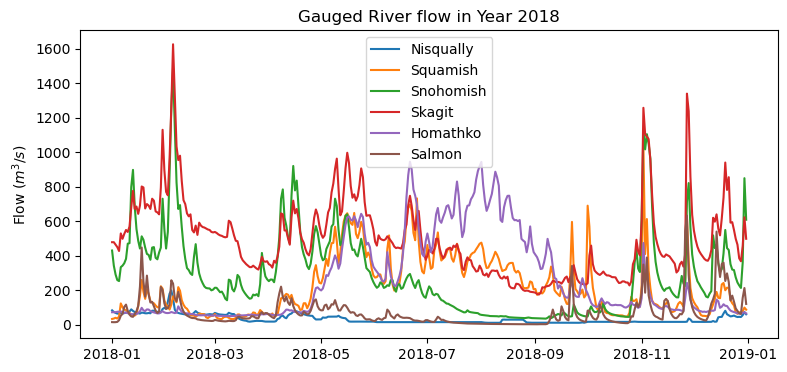

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Nisqually[Nisqually['YYYY'] == year]['DateTime'], Nisqually[Nisqually['YYYY'] == year]['DISCHARGE'], label='Nisqually')
ax.plot(Squamish[Squamish['YYYY'] == year]['DateTime'], Squamish[Squamish['YYYY'] == year]['DISCHARGE'], label='Squamish')
ax.plot(Snohomish[Snohomish['YYYY'] == year]['DateTime'], Snohomish[Snohomish['YYYY'] == year]['DISCHARGE'], label='Snohomish')
ax.plot(Skagit[Skagit['YYYY'] == year]['DateTime'], Skagit[Skagit['YYYY'] == year]['DISCHARGE'], label='Skagit')
ax.plot(Homathko[Homathko['YYYY'] == year]['DateTime'], Homathko[Homathko['YYYY'] == year]['DISCHARGE'], label='Homathko')
ax.plot(Salmon[Salmon['YYYY'] == year]['DateTime'], Salmon[Salmon['YYYY'] == year]['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow in Year ' + str(year))

plt.legend()

## Look at dailies rivers

In [9]:
sys.path.insert(1, '../../../../MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import river_202108 as rivers

In [10]:
year_dailies_path = '../../../../../../results/forcing/rivers/R202108Dailies_y' + str(year) + '*.nc'
year_dailies_list = sorted(glob.glob(year_dailies_path))

In [11]:
year_field = xr.open_dataset(year_dailies_list[0]).rorunoff[0,:,:]

for daily in year_dailies_list:
    day_field = xr.open_dataset(daily).rorunoff[0,:,:]

    year_field = np.dstack([year_field, day_field])

In [12]:
year_field  # need to remove first element
year_field_fin = np.delete(year_field, 0, axis=2)

In [13]:
# write a function that accepts a year field, a watershed, and a river name and creates a timeseries

def ts_from_dai(w_shed, r_call, data_field):
    return data_field[rivers.prop_dict[w_shed][r_call]['i'], rivers.prop_dict[w_shed][r_call]['j'], :]

In [14]:
Nisqually_dai = ts_from_dai('puget','NisquallyMcAllister',year_field_fin)
Squamish_dai = ts_from_dai('howe','Squamish',year_field_fin)
Homathko_dai = ts_from_dai('bute','Homathko',year_field_fin)
Elwha_dai = ts_from_dai('jdf','Elwha',year_field_fin)
Nanaimo_dai = ts_from_dai('evi_s','Nanaimo1',year_field_fin)  # others
Cowichan_dai = ts_from_dai('evi_s','Cowichan1',year_field_fin)  # others
Stillaguamish_dai = ts_from_dai('skagit','Stillaguamish1',year_field_fin)  # others
Puyallup_dai = ts_from_dai('puget','Puyallup',year_field_fin)
Campbell_dai = ts_from_dai('fraser','LittleCampbell',year_field_fin)
Nooksack_dai = ts_from_dai('fraser','Nooksack',year_field_fin)  # others
Snohomish_dai = ts_from_dai('skagit','SnohomishAllenQuilceda',year_field_fin)
Skagit_dai = ts_from_dai('skagit','Skagit1',year_field_fin)  # others
Salmon_dai = ts_from_dai('evi_n','SalmonSayward',year_field_fin)

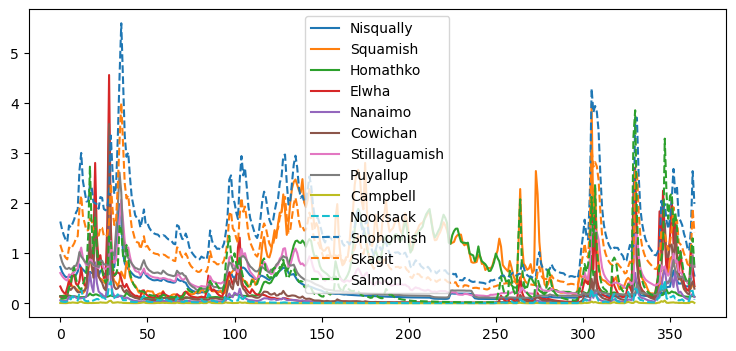

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Nisqually_dai, linewidth = 1.5,label='Nisqually')
ax.plot(Squamish_dai, linewidth = 1.5,label='Squamish')
ax.plot(Homathko_dai, linewidth = 1.5,label='Homathko')
ax.plot(Elwha_dai, linewidth = 1.5,label='Elwha')
ax.plot(Nanaimo_dai, linewidth = 1.5,label='Nanaimo')
ax.plot(Cowichan_dai, linewidth = 1.5,label='Cowichan')
ax.plot(Stillaguamish_dai, linewidth = 1.5,label='Stillaguamish')
ax.plot(Puyallup_dai, linewidth = 1.5,label='Puyallup')
ax.plot(Campbell_dai, linewidth = 1.5,label='Campbell')
ax.plot(Nooksack_dai, linewidth = 1.5,linestyle='--',label='Nooksack')
ax.plot(Snohomish_dai, linewidth = 1.5,linestyle='--',label='Snohomish')
ax.plot(Skagit_dai, linewidth = 1.5,linestyle='--',label='Skagit')
ax.plot(Salmon_dai, linewidth = 1.5,linestyle='--',label='Salmon')

ax.legend()

## Compute yearly avg for certain rivers

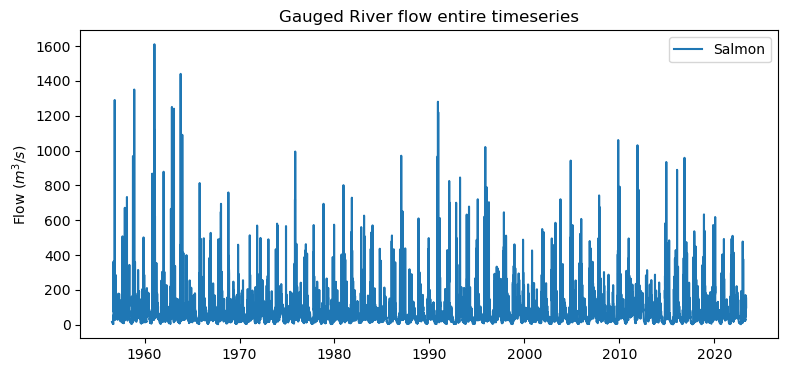

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon['DateTime'], Salmon['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries')

plt.legend()

In [25]:
np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)

/tmp/ipykernel_5933/1672688322.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  np.mean(Salmon.groupby(['YYYY']).mean()['DISCHARGE'].values)


64.74172302453553

/tmp/ipykernel_5933/3202137495.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Salmon.groupby(['YYYY']).mean()
/tmp/ipykernel_5933/3202137495.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')


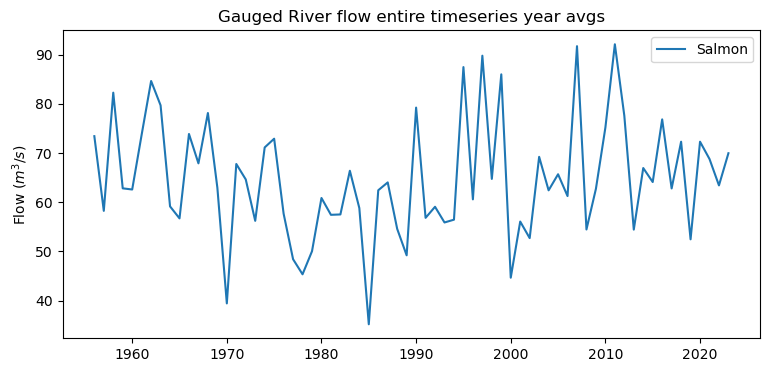

In [22]:
Salmon.groupby(['YYYY']).mean()

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

ax.plot(Salmon.groupby(['YYYY']).mean()['DISCHARGE'], label='Salmon')

ax.set_ylabel(r'Flow ($m^3/s$)')
ax.set_title('Gauged River flow entire timeseries year avgs')

plt.legend()